**Data Exploration and Cleaning**

In [ ]:
import pandas as pd

# Load user_interactions.csv
user_interactions_df = pd.read_csv('data/user_interactions.csv')
print(user_interactions_df.head())

# Load purchase_data.csv
purchase_data_df = pd.read_csv('data/purchase_data.csv')
print(purchase_data_df.head())

# Load website_performance.csv
website_performance_df = pd.read_csv('data/website_performance.csv')
print(website_performance_df.head())

     User_ID    Page_Viewed  Time_Spent_Seconds
0  User_3198       Homepage                 560
1   User_126  Category Page                 168
2  User_1376  Category Page                 122
3  User_1117      Cart Page                 329
4  User_3683  Category Page                 391
    Purchase_ID    User_ID  Product_ID  Transaction_Amount  \
0  Purchase_948  User_3840  Product_19           62.843031   
1  Purchase_905  User_1846   Product_9           21.780079   
2  Purchase_704  User_1700   Product_8          138.264455   
3  Purchase_766  User_4117  Product_15           74.991367   
4   Purchase_36  User_3053   Product_7          162.569998   

         Purchase_Time  
0  2023-04-02 16:35:46  
1  2023-04-14 16:38:27  
2  2023-01-21 11:21:31  
3  2023-01-29 04:44:04  
4  2023-05-24 03:30:23  
        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-0

**User Behaviour Analysis**

In [ ]:
import matplotlib.pyplot as plt

# Calculate the most visited pages and average time spent on each page
most_visited_pages = user_interactions_df['Page_Viewed'].value_counts().nlargest(5)
average_time_spent = user_interactions_df.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()

print("Most visited pages:")
print(most_visited_pages)
print("\nAverage time spent on each page:")
print(average_time_spent)

# Calculate the click-through rate for different sections of the website
# Assuming 'homepage' and 'product_categories' are two sections, you can adapt this based on your actual data.
click_through_rate = user_interactions_df.groupby('Page_Viewed')['Page_Viewed'].count()
total_clicks = click_through_rate.sum()
click_through_rate = (click_through_rate / total_clicks) * 100

print("\nClick-through rate for different sections of the website:")
print(click_through_rate)

Most visited pages:
Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

Average time spent on each page:
Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

Click-through rate for different sections of the website:
Page_Viewed
Cart Page        20.82
Category Page    19.44
Checkout Page    19.78
Homepage         20.90
Product Page     19.06
Name: Page_Viewed, dtype: float64


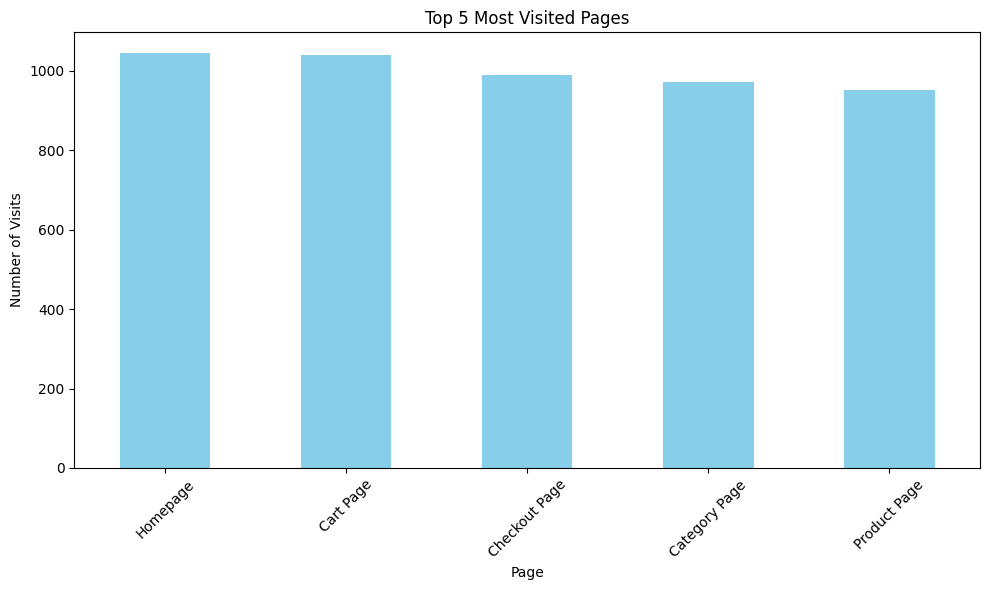

In [ ]:
# Visualization 1: Bar plot for most visited pages
plt.figure(figsize=(10, 6))
most_visited_pages.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Visited Pages')
plt.xlabel('Page')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


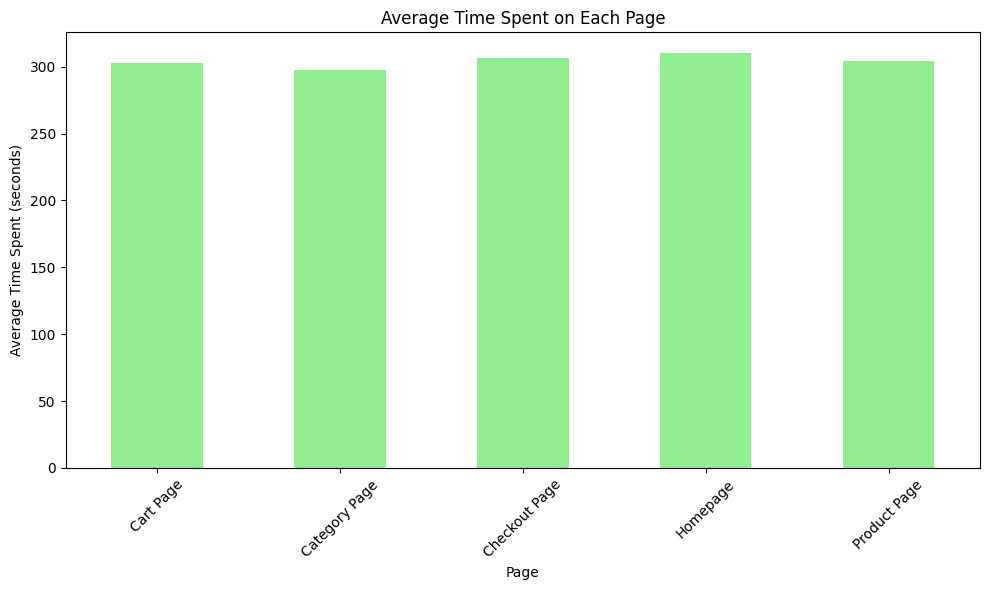

In [ ]:
# Visualization 2: Bar plot for average time spent on each page
plt.figure(figsize=(10, 6))
average_time_spent.plot(kind='bar', color='lightgreen')
plt.title('Average Time Spent on Each Page')
plt.xlabel('Page')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

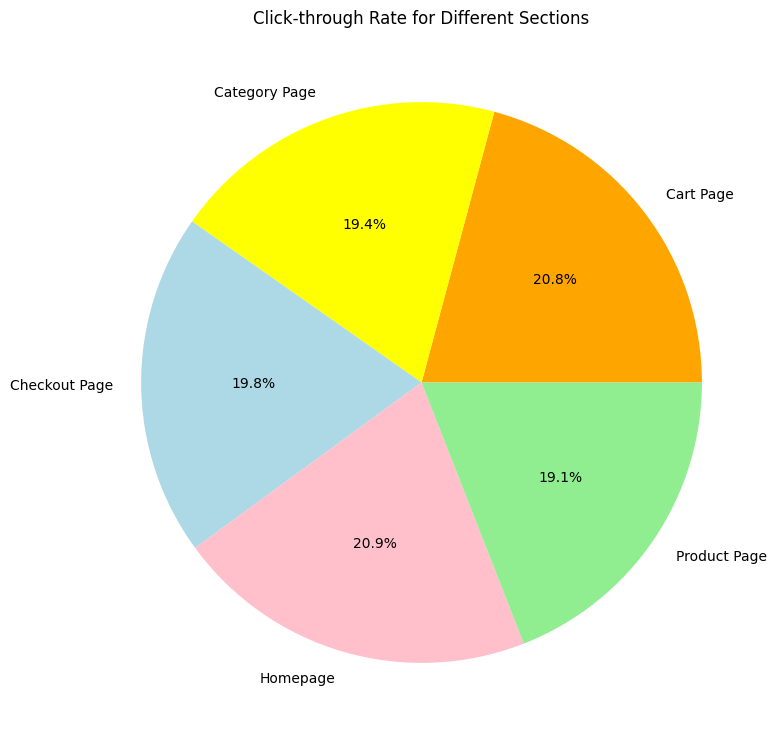

In [ ]:
# Visualization 3: Pie chart for click-through rate
plt.figure(figsize=(8, 8))
click_through_rate.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'yellow', 'lightblue', 'pink', 'lightgreen'])
plt.title('Click-through Rate for Different Sections')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Purchase Analysis**

Overall Conversion Rate for the website: 109.17%

Top Selling Products:
Product_19    66
Product_13    59
Product_4     58
Product_20    58
Product_7     56
Name: Product_ID, dtype: int64

Top Selling Product Categories:
Prod    1000
Name: Product_Category, dtype: int64


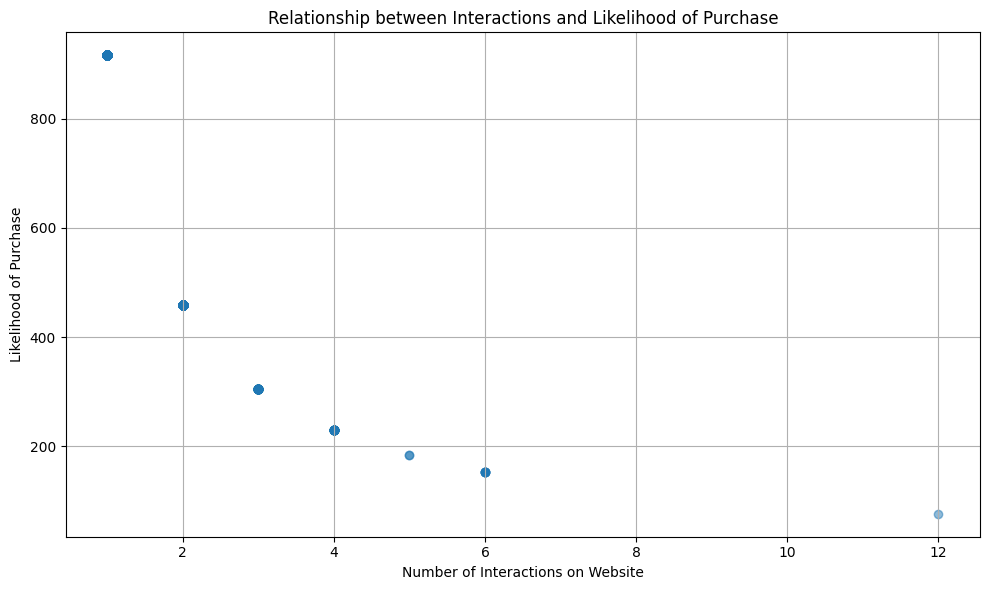

In [ ]:
# 1. Calculate the overall conversion rate for the website based on purchase data

total_purchases = purchase_data_df.shape[0]  # Total number of purchases
total_visitors = purchase_data_df['User_ID'].nunique()  # Total number of unique visitors

overall_conversion_rate = (total_purchases / total_visitors) * 100
print("Overall Conversion Rate for the website: {:.2f}%".format(overall_conversion_rate))

# 2. Create and prepare a new variable for product categories

# Assuming that the product category can be extracted from the Product_ID column (e.g., 'PROD001' belongs to 'Category1')
purchase_data_df['Product_Category'] = purchase_data_df['Product_ID'].str.extract('(\w{4})')

# 3. Identify the top-selling products and product categories

top_selling_products = purchase_data_df['Product_ID'].value_counts().nlargest(5)
top_selling_categories = purchase_data_df['Product_Category'].value_counts().nlargest(5)

print("\nTop Selling Products:")
print(top_selling_products)
print("\nTop Selling Product Categories:")
print(top_selling_categories)

# 4. Explore the relationship between the number of interactions and the likelihood of a purchase

# Merge purchase data with user interactions data on User_ID
merged_df = pd.merge(purchase_data_df, user_interactions_df, on='User_ID', how='left')

# Calculate the likelihood of a purchase based on the number of interactions
interactions_vs_purchase = merged_df.groupby('User_ID')['Page_Viewed'].count()
purchase_likelihood = merged_df['User_ID'].nunique() / interactions_vs_purchase
purchase_likelihood = purchase_likelihood.fillna(0)

# Visualization: Scatter plot to show the relationship between interactions and likelihood of purchase
plt.figure(figsize=(10, 6))
plt.scatter(interactions_vs_purchase, purchase_likelihood, alpha=0.5)
plt.title('Relationship between Interactions and Likelihood of Purchase')
plt.xlabel('Number of Interactions on Website')
plt.ylabel('Likelihood of Purchase')
plt.grid(True)
plt.tight_layout()
plt.show()

**Cohort Analysis**


In [ ]:
# no idea

**Website Performance Optimization**

Average Page Load Time: 5.866266048900847
Average Bounce Rate: 0.4526503154628032
Months with High Bounce Rate: ['2023-01-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-08-01', '2023-10-01', '2023-11-01']
Months with Low Conversion Rate: ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']


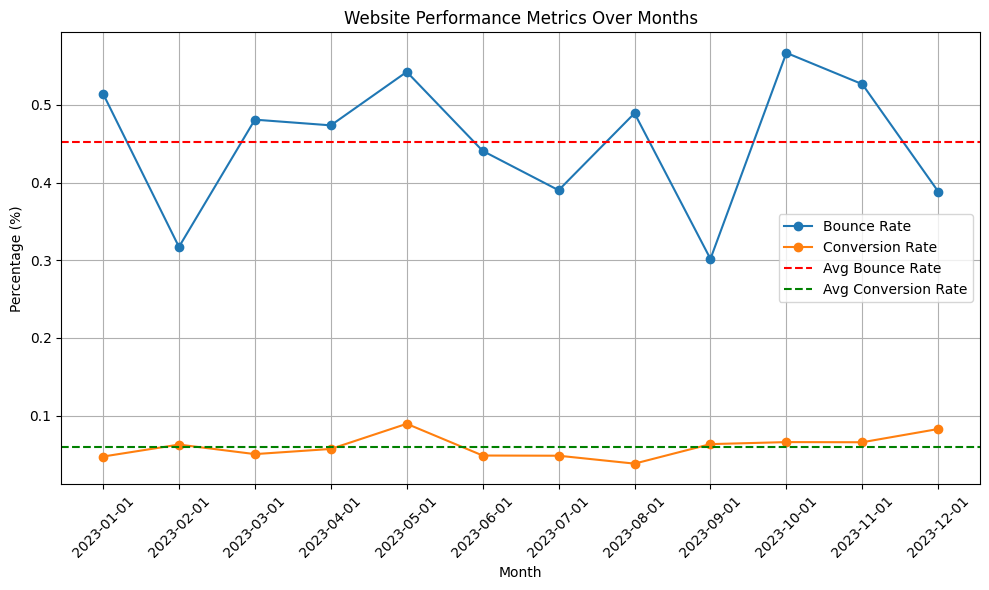

In [ ]:
# Step 1: Analyze website performance metrics to identify areas for improvement

# Calculate the average page load time and bounce rate
average_page_load_time = website_performance_df['Page_Load_Time'].mean()
average_bounce_rate = website_performance_df['Bounce_Rate'].mean()

# Identify months with high bounce rate and low conversion rate
high_bounce_rate_months = website_performance_df[website_performance_df['Bounce_Rate'] > average_bounce_rate]['Month']
low_conversion_rate_months = website_performance_df[website_performance_df['Conversion_Rate'] < average_bounce_rate]['Month']

print("Average Page Load Time:", average_page_load_time)
print("Average Bounce Rate:", average_bounce_rate)
print("Months with High Bounce Rate:", high_bounce_rate_months.to_list())
print("Months with Low Conversion Rate:", low_conversion_rate_months.to_list())

# Step 2: Propose strategies to reduce bounce rate and improve the conversion rate

# Based on the identified issues, we can propose specific strategies to address them.
# For example, to reduce bounce rate, we can optimize page load time, improve website content and design, use clear call-to-action buttons, etc.
# To improve conversion rate, we can focus on targeted marketing, optimize the checkout process, provide personalized recommendations, etc.

# Step 3: Create a visualization dashboard to monitor website performance in real-time

# For real-time monitoring, we would need a continuous data feed, such as streaming data or regular updates to the dataset.
# For the purpose of this example, we'll create a simple line plot to visualize the trend of bounce rate and conversion rate over months.

plt.figure(figsize=(10, 6))
plt.plot(website_performance_df['Month'], website_performance_df['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(website_performance_df['Month'], website_performance_df['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.axhline(average_bounce_rate, color='red', linestyle='--', label='Avg Bounce Rate')
plt.axhline(website_performance_df['Conversion_Rate'].mean(), color='green', linestyle='--', label='Avg Conversion Rate')
plt.title('Website Performance Metrics Over Months')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()